# Scenerio Testing BHC Module

### Test Scenerios:

1) Simulated data clusters: Three component Gaussian mixture

2) Real data set presented in BHC paper: Glass data set

In [2]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy import linalg as la
from scipy import random as rnd
from scipy.special import gamma
import matplotlib.pyplot as plt
from sklearn import datasets as data

import bhc

### Data Sets

**Three component Gaussian mixture:**

In [3]:
# bivariate gaussian params
mu1 = np.zeros(3)
cov1 = np.eye(3)

mu2 = np.array([5, 3, 0])
cov2 = np.eye(3)# * 2

mu3 = np.array([8, 12, 1])
cov3 = np.eye(3)* 0.5#np.array([3.4, 0, 0, 5.1]).reshape(2, 2)

# multinom params
p1 = 0.3
p2 = 0.4
p3 = 1 - p2 - p1

# number of total draws
draws = 100

In [4]:
# random draws
rnd.seed(1)

knum = rnd.multinomial(draws, (p1, p2, p3))

gaus1 = rnd.multivariate_normal(mu1, cov1, knum[0])
gaus2 = rnd.multivariate_normal(mu2, cov2, knum[1])
gaus3 = rnd.multivariate_normal(mu3, cov3, knum[2])

# join columns into dataframe
x1 = pd.Series(np.r_[gaus1[:, 0], gaus2[:, 0], gaus3[:, 0]])
x2 = pd.Series(np.r_[gaus1[:, 1], gaus2[:, 1], gaus3[:, 1]])
x3 = pd.Series(np.r_[gaus1[:, 2], gaus2[:, 2], gaus3[:, 2]])
c = pd.Series(np.r_[np.zeros(knum[0]), np.ones(knum[1]), np.ones(knum[2]) * 2])
dat = {"x1" : x1, "x2" : x2, "x3" : x3, "c" : c}
clustData = pd.DataFrame(dat)

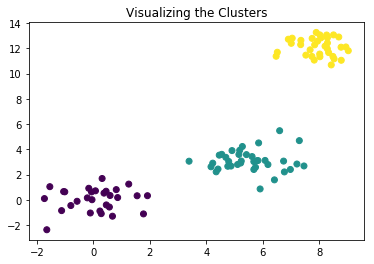

In [5]:
plt.scatter(clustData["x1"], clustData["x2"], c = clustData["c"])
plt.title("Visualizing the Clusters")
plt.show()

In [21]:
# priors distribution hyper-parameters
gcPriors = {
    "clusterConcentrationPrior" : {"alpha" : 5},
    "diffuseInvWishPrior" : {"df" : 3, "scale" : np.eye(3)}, # inv wishart params
    "diffuseNormPrior" : {"loc" : clustData.values[:, :3].mean(axis = 0),
                          "scale" : np.eye(3),
                          "meanscale" : 1}, # mvtnormal params
}

In [22]:
gc = clustData.values[:, :3]
gctree = bhc.HierarchyTree(X = gc, allParams = gcPriors)

In [23]:
gctree.grow_tree()

C:\Users\jkklu\Dropbox\Duke_STA\S19\STA663\STA663_Final_Project\bhc\helpfncs\hypothesis\__init__.py:123: RuntimeWarning: invalid value encountered in double_scalars
  rk = pik * ijH1 / ijMarg


In [24]:
# pre prunning tree summary
gctree.tree_summary()

Summary for tier 9:
-------------------------------
Number of clusters: 1
  Cluster 0 size: 100.0
	 Posterior merge probability: nan


Summary for tier 8:
-------------------------------
Number of clusters: 1
  Cluster 0 size: 84.0
	 Posterior merge probability: nan


Summary for tier 7:
-------------------------------
Number of clusters: 1
  Cluster 0 size: 66.0
	 Posterior merge probability: 1.0


Summary for tier 6:
-------------------------------
Number of clusters: 1
  Cluster 0 size: 42.0
	 Posterior merge probability: 1.6e-112


Summary for tier 5:
-------------------------------
Number of clusters: 3
  Cluster 0 size: 26.0
	 Posterior merge probability: 4.2e-68
  Cluster 1 size: 24.0
	 Posterior merge probability: 2e-76
  Cluster 2 size: 18.0
	 Posterior merge probability: 2.7e-82


Summary for tier 4:
-------------------------------
Number of clusters: 6
  Cluster 0 size: 16.0
	 Posterior merge probability: 5.2e-35
  Cluster 1 size: 10.0
	 Posterior merge probability: 3.4e-40


In [25]:
gctree.prune_tree()

In [26]:
gctree.tree_summary()

Summary for tier 9:
-------------------------------
Number of clusters: 1
  Cluster 0 size: 100.0
	 Posterior merge probability: nan


Summary for tier 8:
-------------------------------
Number of clusters: 1
  Cluster 0 size: 84.0
	 Posterior merge probability: nan


Summary for tier 7:
-------------------------------
Number of clusters: 1
  Cluster 0 size: 66.0
	 Posterior merge probability: 1.0


Summary for tier 1:
-------------------------------
Number of clusters: 100
  Cluster 0 size: 1.0
	 Posterior merge probability: 1.0
  Cluster 1 size: 1.0
	 Posterior merge probability: 1.0
  Cluster 2 size: 1.0
	 Posterior merge probability: 1.0
  Cluster 3 size: 1.0
	 Posterior merge probability: 1.0
  Cluster 4 size: 1.0
	 Posterior merge probability: 1.0
  Cluster 5 size: 1.0
	 Posterior merge probability: 1.0
  Cluster 6 size: 1.0
	 Posterior merge probability: 1.0
  Cluster 7 size: 1.0
	 Posterior merge probability: 1.0
  Cluster 8 size: 1.0
	 Posterior merge probability: 1.0
  Cluste

In [27]:
gctree.generate_clust_frame()
gctree.clustDF

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102


,Dim_0,Dim_1,Dim_2,clustnum
0,-0.802173,-0.448878,-1.105935,102.0
1,-1.654515,-2.363469,1.135345,102.0
2,-1.017014,0.637362,-0.859907,102.0
3,1.772608,-1.110363,0.181214,102.0
4,0.564345,-0.566510,0.729976,102.0
5,0.372994,0.533811,-0.091973,102.0
6,1.913820,0.330797,1.141943,102.0
7,-1.129595,-0.850052,0.960820,102.0
8,-0.217418,0.158515,0.873418,102.0
9,-0.111383,-1.038039,-1.009480,102.0


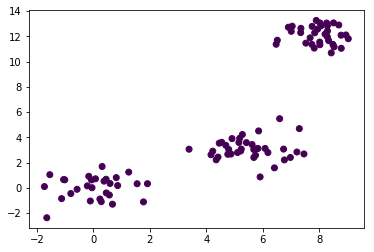

In [28]:
plt.scatter("Dim_0", "Dim_1", c = "clustnum", data=gctree.clustDF)
plt.show()

In [29]:
def purity_score(y_true, y_pred):
    """
    Inputs:
    y_true - an array of the true cluster assignments of type int
    y_pred - an array of the predicted cluster assignments of type int
    
    Output:
    Cluster purity metric (range [0,1]) for the cluster assignments 
    relative to their true values.
    """
    
    from sklearn import metrics
    
    # build confusion matrix
    conf_mat = metrics.cluster.contingency_matrix(y_true, y_pred)
    print(conf_mat)
    # calculate score
    score = np.sum(np.amax(conf_mat, axis=0))/np.sum(conf_mat)
    
    return score

In [30]:
purity_score(clustData["c"], gctree.clustDF["clustnum"])

[[29]
 [37]
 [34]]


0.37

**Glass Data Set:**

In [ ]:
iris= data.load_iris()

In [ ]:
k = iris.data.shape[1]
# priors distribution hyper-parameters
irisPriors = {
    "clusterConcentrationPrior" : {"alpha" : 0.1},
    "diffuseInvWishPrior" : {"df" : 4, "scale" : np.eye(k)}, # inv wishart params
    "diffuseNormPrior" : {"loc" : iris.data.mean(axis = 0),
                          "scale" : np.eye(k),
                          "meanscale" : 1}, # mvtnormal params
}

In [ ]:
iris_tree = bhc.HierarchyTree(X = iris.data, allParams = irisPriors)

In [ ]:
iris_tree.grow_tree()

**Data Set 3**